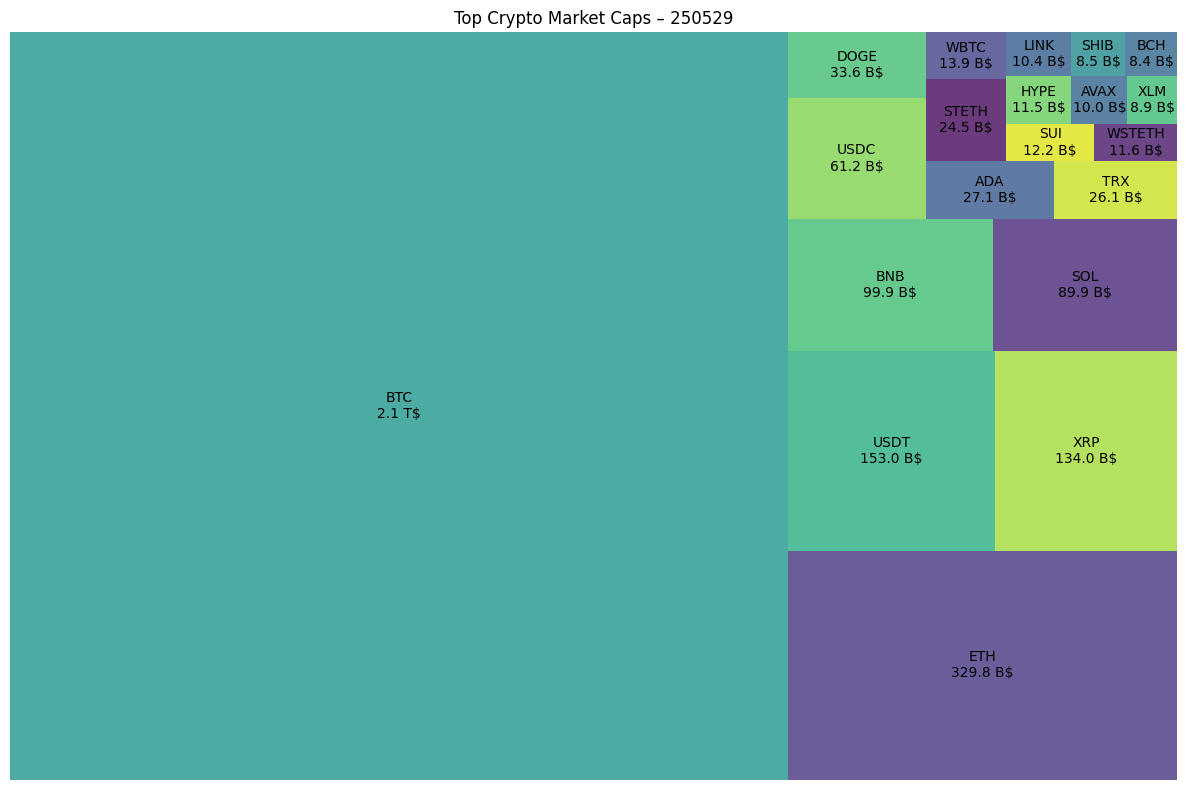

In [5]:
"""002_plot_marketcap.py

Script Python permettant de visualiser un fichier JSON produit par
001_top_crypto_snapshot.py sous forme de treemap (surface proportionnelle
à la market cap). Aucune analyse de volume.

Usage (dans un notebook ou un script) :
    plot_marketcap("crypto_data/market_data/250529_top_crypto_history.json")

Requiert : matplotlib, squarify
"""

import json
from pathlib import Path

import matplotlib.pyplot as plt
import squarify  # pip install squarify


def fmt_label(symbol: str, market_cap: float) -> str:
    if market_cap >= 1e12:
        return f"{symbol}\n{market_cap / 1e12:.1f} T$"
    elif market_cap >= 1e9:
        return f"{symbol}\n{market_cap / 1e9:.1f} B$"
    elif market_cap >= 1e6:
        return f"{symbol}\n{market_cap / 1e6:.1f} M$"
    return f"{symbol}\n{market_cap:.0f}"


def load_data(filepath: Path) -> tuple[list[str], list[float], str]:
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    symbols = [item["symbol"].upper() for item in data]
    market_caps = [item["market_cap"] for item in data]
    date_str = filepath.stem.split("_")[0]  # e.g. 250529
    return symbols, market_caps, date_str


def plot_marketcap(json_path: str | Path) -> None:
    path = Path(json_path)
    if not path.exists():
        raise FileNotFoundError(f"Fichier non trouvé : {json_path}")

    symbols, market_caps, date_str = load_data(path)
    labels = [fmt_label(sym, cap) for sym, cap in zip(symbols, market_caps)]

    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=market_caps, label=labels, alpha=0.8)
    plt.axis("off")
    plt.title(f"Top Crypto Market Caps – {date_str}")
    plt.tight_layout()
    plt.show()


# Exemple d'appel pour exécution directe (facultatif dans notebook)
if __name__ == "__main__":
    example_file = Path("crypto_data/market_data/250529_top_crypto_history.json")
    if example_file.exists():
        plot_marketcap(example_file)
    else:
        print("[INFO] Aucun fichier d'exemple trouvé. Appelez plot_marketcap() avec un chemin valide.")